In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data_ind_youth.csv')

In [ ]:
# converting to datetime format
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')
# sorting order chronologically
df = df.sort_values('year_month').reset_index(drop=True)

#### descriptive statistics

In [11]:
# descriptive statistics
df.describe()

,year_month,Unemployment_Rate
count,34,34.000000
mean,2016-05-02 00:00:00,14.615368
min,2008-02-01 00:00:00,11.812190
25%,2012-03-17 12:00:00,13.048628
50%,2016-05-02 00:00:00,14.249481
75%,2020-06-16 12:00:00,15.957687
max,2024-08-01 00:00:00,18.374399
std,NaN,1.826307


### trends and volatility

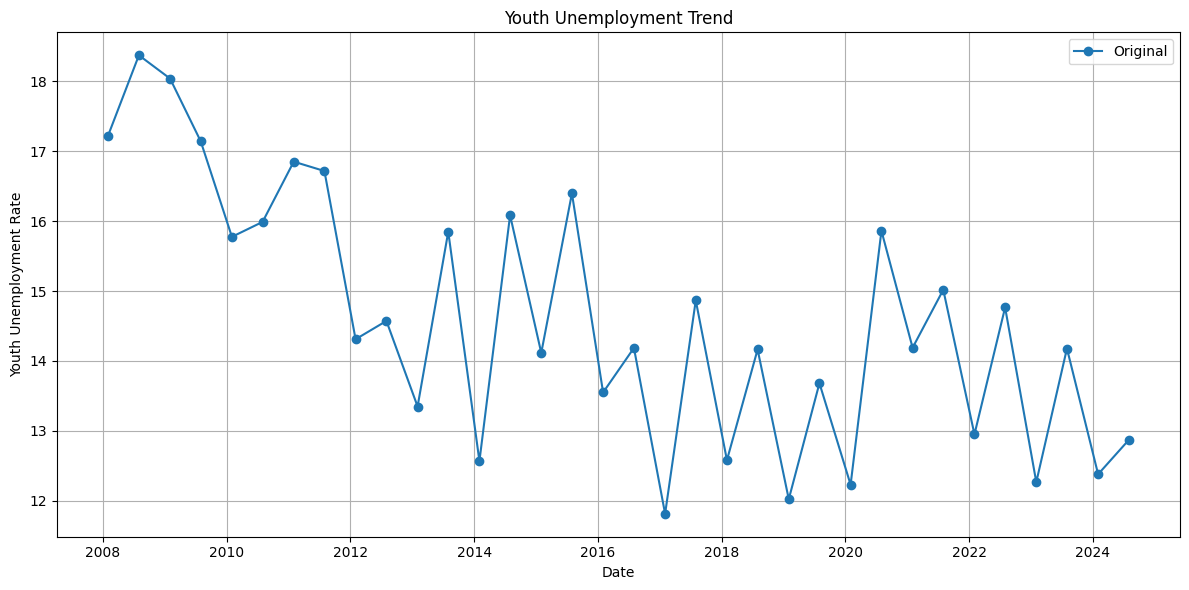

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['year_month'], df['Unemployment_Rate'], label='Original', marker='o')
plt.xlabel('Date')
plt.ylabel('Youth Unemployment Rate')
plt.title('Youth Unemployment Trend')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# adding moving averages (2-period and 4-period) to see smoother trends
df_copy = df.copy()
df_copy['MA_2'] = df_copy['Unemployment_Rate'].rolling(window=2).mean()
df_copy['MA_4'] = df_copy['Unemployment_Rate'].rolling(window=4).mean()

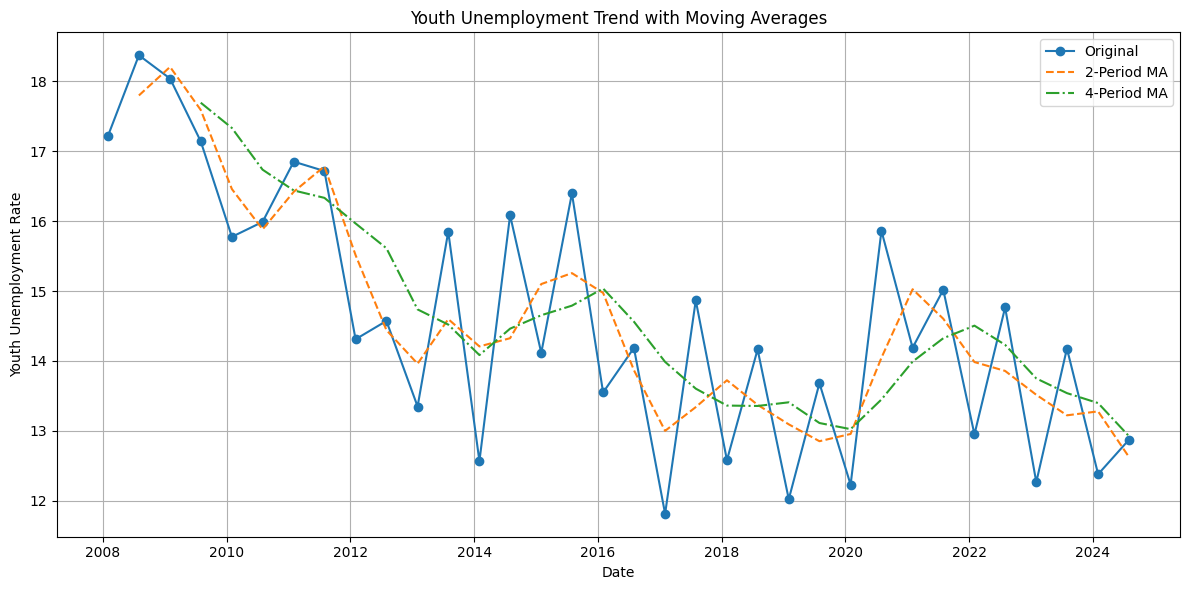

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df_copy['year_month'], df_copy['Unemployment_Rate'], label='Original', marker='o')
plt.plot(df_copy['year_month'], df_copy['MA_2'], label='2-Period MA', linestyle='--')
plt.plot(df_copy['year_month'], df_copy['MA_4'], label='4-Period MA', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Youth Unemployment Rate')
plt.title('Youth Unemployment Trend with Moving Averages')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### seasonality

In [20]:
df_copy['month'] = df_copy['year_month'].dt.month
df_copy['year'] = df_copy['year_month'].dt.year

<Axes: xlabel='month', ylabel='Unemployment_Rate'>

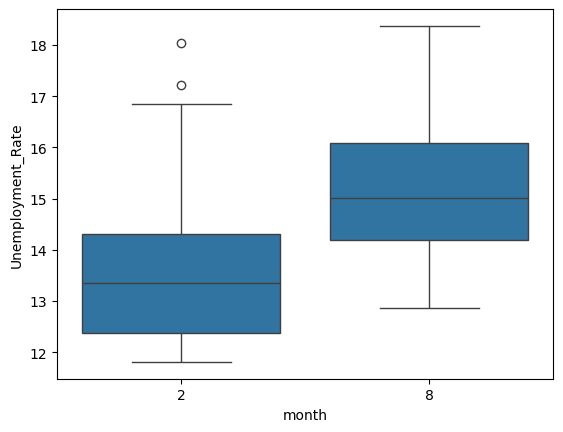

In [19]:
sns.boxplot(x='month', y='Unemployment_Rate', data=df_copy)

In [21]:
pivot_df = df_copy.pivot(index='year', columns='month', values='Unemployment_Rate')
pivot_df.columns = ['Feb', 'Aug']

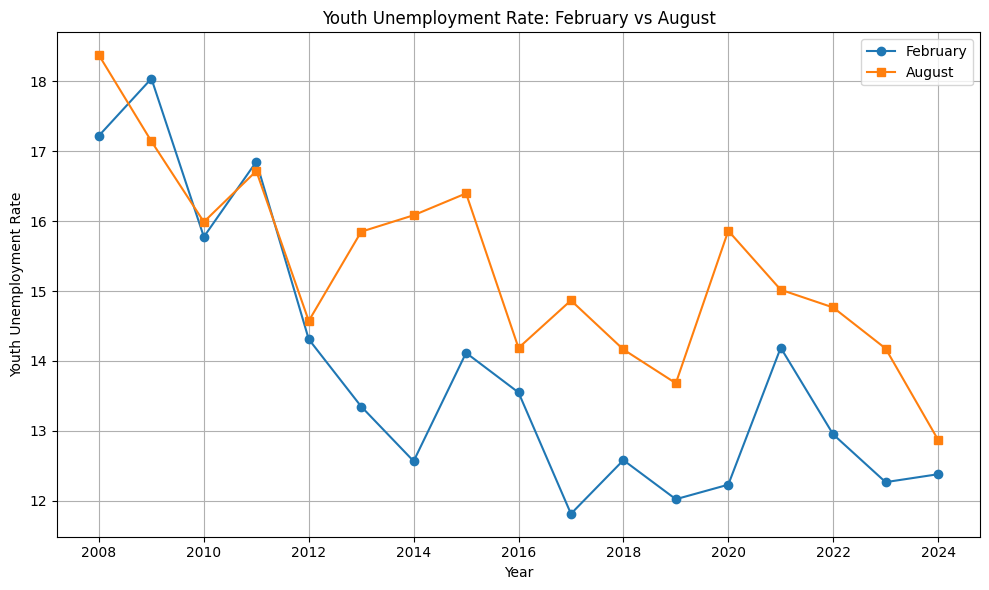

In [22]:
plt.figure(figsize=(10,6))
plt.plot(pivot_df.index, pivot_df['Feb'], label='February', marker='o')
plt.plot(pivot_df.index, pivot_df['Aug'], label='August', marker='s')
plt.xlabel('Year')
plt.ylabel('Youth Unemployment Rate')
plt.title('Youth Unemployment Rate: February vs August')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_test = adfuller(df['Unemployment_Rate'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# if p-value > 0.05, series is non-stationary → difference the series

ADF Statistic: -1.9510270770585783
p-value: 0.3084498727851944


differencing

In [26]:
# first difference of the series
df_copy['Unemployment_Diff_1'] = df_copy['Unemployment_Rate'].diff()

# Drop the first row (NaN after differencing)
df_diff = df_copy.dropna(subset=['Unemployment_Diff_1'])

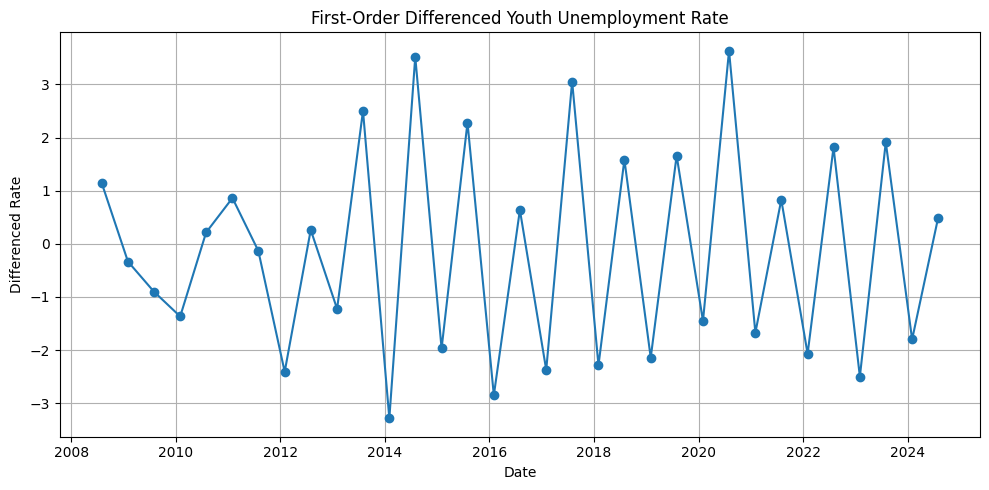

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(df_diff['year_month'], df_diff['Unemployment_Diff_1'], marker='o')
plt.title('First-Order Differenced Youth Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Differenced Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
adf_test_diff_1 = adfuller(df_diff['Unemployment_Diff_1'])
print(f"ADF Statistic: {adf_test_diff_1[0]}")
print(f"p-value: {adf_test_diff_1[1]}")

ADF Statistic: -5.487492241776113
p-value: 2.213091090741889e-06


#### autocorrelation (ACF) & partial autocorrelation (PACF)

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

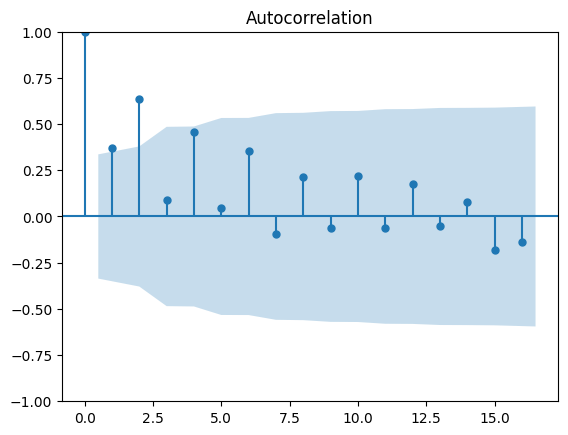

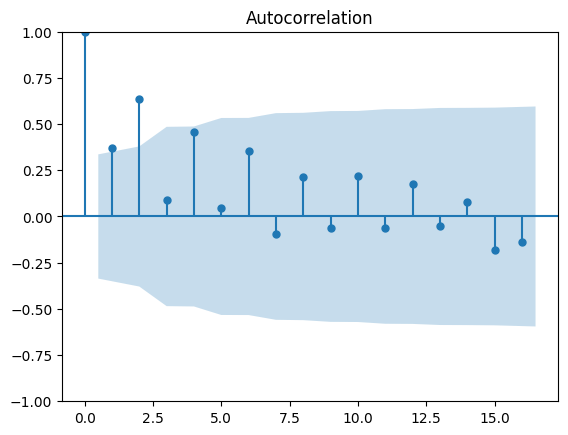

In [ ]:
plot_acf(df['Unemployment_Rate'])
# shows pattern, slow decay suggests non-stationarity

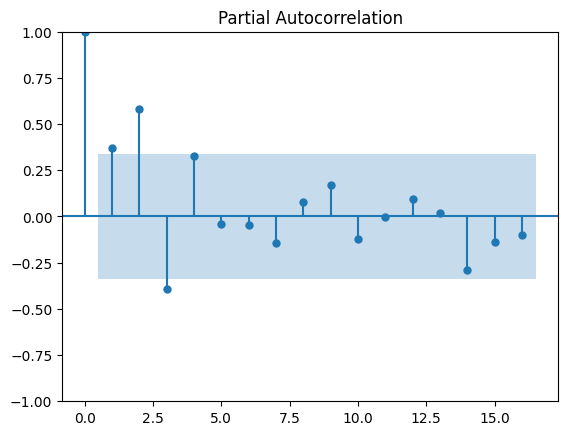

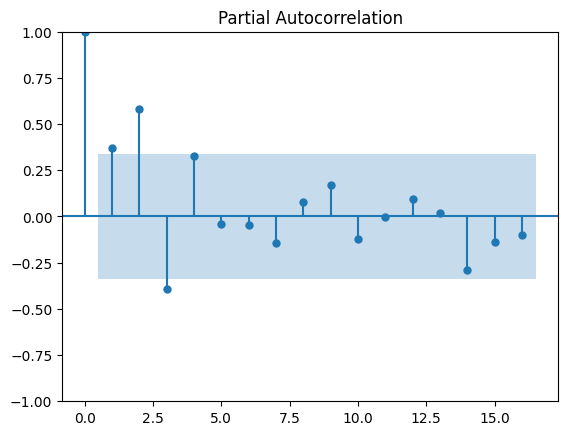

In [ ]:
plot_pacf(df['Unemployment_Rate'])
# lags 1, 2, 3, 4 (spikes) are important in modeling the udnerlying data